# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [4]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [5]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [6]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [12]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 2e-9, 3e-9, 4e-9, 5e-9]
regularization_strengths = [1e6, 2e6, 3e6, 4e6, 5e6]
#learning_rates = [1e-9, 1e-8, 1e-7]
#regularization_strengths = [1e5,0.5e6, 1e6,3e6, 1e7]
results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate, regularization_strength,
                      num_iters=2000, verbose=False)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(learning_rate,regularization_strength)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.097653 val accuracy: 0.090000
lr 1.000000e-09 reg 2.000000e+06 train accuracy: 0.108286 val accuracy: 0.119000
lr 1.000000e-09 reg 3.000000e+06 train accuracy: 0.107673 val accuracy: 0.095000
lr 1.000000e-09 reg 4.000000e+06 train accuracy: 0.175918 val accuracy: 0.178000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.364653 val accuracy: 0.352000
lr 2.000000e-09 reg 1.000000e+06 train accuracy: 0.111204 val accuracy: 0.101000
lr 2.000000e-09 reg 2.000000e+06 train accuracy: 0.247367 val accuracy: 0.258000
lr 2.000000e-09 reg 3.000000e+06 train accuracy: 0.414041 val accuracy: 0.414000
lr 2.000000e-09 reg 4.000000e+06 train accuracy: 0.413469 val accuracy: 0.409000
lr 2.000000e-09 reg 5.000000e+06 train accuracy: 0.416020 val accuracy: 0.420000
lr 3.000000e-09 reg 1.000000e+06 train accuracy: 0.166122 val accuracy: 0.182000
lr 3.000000e-09 reg 2.000000e+06 train accuracy: 0.413857 val accuracy: 0.427000
lr 3.000000e-09 reg 3.000000

In [13]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.427


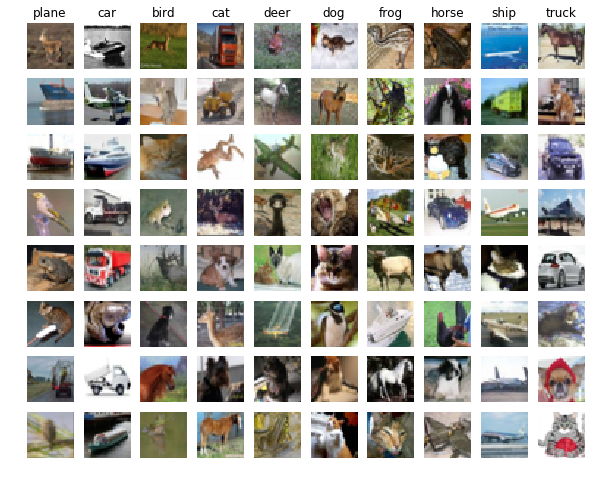

In [14]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

They make sense if we use out feature extraction method. HOG will check if the images has similar edges so plane,deer, car etc has some kind of edges - therfore they been considered similar. In addition color histogram wil check for similar colors in the images so images with similar colors will get higher score. We can look for instance at the images that classified as plane - most of them has blue colors and the shape of the object similar to a plane. 

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [15]:
print X_train_feats.shape

(49000L, 155L)


In [32]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

best_net = TwoLayerNet(input_dim, hidden_dim, num_classes)



################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
# Train the network
stats = best_net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=2000, batch_size=1200,
            learning_rate=0.9, learning_rate_decay=0.95,
            reg=0.0, verbose=True)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 1.391784
iteration 200 / 2000: loss 1.275066
iteration 300 / 2000: loss 1.195196
iteration 400 / 2000: loss 1.140831
iteration 500 / 2000: loss 1.091915
iteration 600 / 2000: loss 0.994316
iteration 700 / 2000: loss 0.909225
iteration 800 / 2000: loss 0.925573
iteration 900 / 2000: loss 0.870085
iteration 1000 / 2000: loss 0.880547
iteration 1100 / 2000: loss 0.821998
iteration 1200 / 2000: loss 0.820109
iteration 1300 / 2000: loss 0.847451
iteration 1400 / 2000: loss 0.784616
iteration 1500 / 2000: loss 0.784399
iteration 1600 / 2000: loss 0.714214
iteration 1700 / 2000: loss 0.759864
iteration 1800 / 2000: loss 0.689258
iteration 1900 / 2000: loss 0.722676


In [33]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print test_acc

0.609


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

We will try LBP feature extraction method.
Local Binary Patterns, or LBPs for short, are a texture descriptor - it compute a local representation of texture. This local representation is constructed by comparing each pixel with its surrounding neighborhood of pixels.

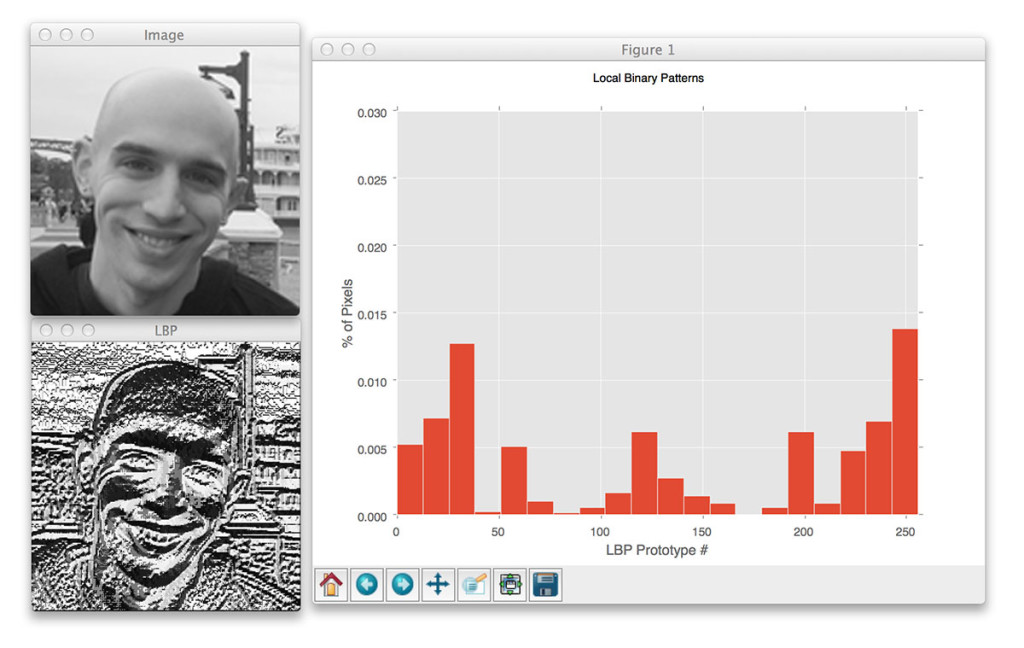

In [40]:
from IPython.display import Image
Image(filename='lbp_256bin_histogram-1024x648.jpg')

In [49]:
# import the necessary packages
from skimage import feature
import numpy as np
 
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
 

    def rgb2gray(rgb):
      """Convert RGB image to grayscale

        Parameters:
          rgb : RGB image

        Returns:
          gray : grayscale image
          
      """
      return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
    
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        if image.ndim == 3:
            image = rgb2gray(image)
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
 
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
 
        # return the histogram of Local Binary Patterns
        return hist

In [50]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
LBPobj = LocalBinaryPatterns(24,8)
feature_fns = [LBPobj.describe]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [51]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 2e-9, 3e-9, 4e-9, 5e-9]
regularization_strengths = [1e6, 2e6, 3e6, 4e6, 5e6]
#learning_rates = [1e-9, 1e-8, 1e-7]
#regularization_strengths = [1e5,0.5e6, 1e6,3e6, 1e7]
results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate, regularization_strength,
                      num_iters=2000, verbose=False)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(learning_rate,regularization_strength)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.108592 val accuracy: 0.129000
lr 1.000000e-09 reg 2.000000e+06 train accuracy: 0.095796 val accuracy: 0.090000
lr 1.000000e-09 reg 3.000000e+06 train accuracy: 0.119551 val accuracy: 0.118000
lr 1.000000e-09 reg 4.000000e+06 train accuracy: 0.129347 val accuracy: 0.123000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.183327 val accuracy: 0.168000
lr 2.000000e-09 reg 1.000000e+06 train accuracy: 0.100449 val accuracy: 0.114000
lr 2.000000e-09 reg 2.000000e+06 train accuracy: 0.143429 val accuracy: 0.137000
lr 2.000000e-09 reg 3.000000e+06 train accuracy: 0.197837 val accuracy: 0.232000
lr 2.000000e-09 reg 4.000000e+06 train accuracy: 0.197449 val accuracy: 0.220000
lr 2.000000e-09 reg 5.000000e+06 train accuracy: 0.199633 val accuracy: 0.216000
lr 3.000000e-09 reg 1.000000e+06 train accuracy: 0.126347 val accuracy: 0.113000
lr 3.000000e-09 reg 2.000000e+06 train accuracy: 0.195959 val accuracy: 0.219000
lr 3.000000e-09 reg 3.000000

In [52]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.206


As we can see, LBP is not better  than HOG + HSV. At least we tried ;)

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

In [34]:
# Check if feature extraction by HOG alone or color histogram are better than both together
# HOG ALONE
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [35]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 2e-9, 3e-9, 4e-9, 5e-9]
regularization_strengths = [1e6, 2e6, 3e6, 4e6, 5e6]
#learning_rates = [1e-9, 1e-8, 1e-7]
#regularization_strengths = [1e5,0.5e6, 1e6,3e6, 1e7]
results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate, regularization_strength,
                      num_iters=2000, verbose=False)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(learning_rate,regularization_strength)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.102735 val accuracy: 0.091000
lr 1.000000e-09 reg 2.000000e+06 train accuracy: 0.114061 val accuracy: 0.111000
lr 1.000000e-09 reg 3.000000e+06 train accuracy: 0.106449 val accuracy: 0.129000
lr 1.000000e-09 reg 4.000000e+06 train accuracy: 0.160816 val accuracy: 0.183000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.346122 val accuracy: 0.348000
lr 2.000000e-09 reg 1.000000e+06 train accuracy: 0.117265 val accuracy: 0.116000
lr 2.000000e-09 reg 2.000000e+06 train accuracy: 0.246041 val accuracy: 0.266000
lr 2.000000e-09 reg 3.000000e+06 train accuracy: 0.385878 val accuracy: 0.393000
lr 2.000000e-09 reg 4.000000e+06 train accuracy: 0.386531 val accuracy: 0.395000
lr 2.000000e-09 reg 5.000000e+06 train accuracy: 0.384816 val accuracy: 0.384000
lr 3.000000e-09 reg 1.000000e+06 train accuracy: 0.137184 val accuracy: 0.151000
lr 3.000000e-09 reg 2.000000e+06 train accuracy: 0.386796 val accuracy: 0.397000
lr 3.000000e-09 reg 3.000000

In [36]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.41


As we can see. HOG alone is wors than HOG + Hsv

We will check now HSV alone:

In [37]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [38]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 2e-9, 3e-9, 4e-9, 5e-9]
regularization_strengths = [1e6, 2e6, 3e6, 4e6, 5e6]
#learning_rates = [1e-9, 1e-8, 1e-7]
#regularization_strengths = [1e5,0.5e6, 1e6,3e6, 1e7]
results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate, regularization_strength,
                      num_iters=2000, verbose=False)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(learning_rate,regularization_strength)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.111163 val accuracy: 0.112000
lr 1.000000e-09 reg 2.000000e+06 train accuracy: 0.115429 val accuracy: 0.130000
lr 1.000000e-09 reg 3.000000e+06 train accuracy: 0.109510 val accuracy: 0.131000
lr 1.000000e-09 reg 4.000000e+06 train accuracy: 0.162551 val accuracy: 0.159000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.196143 val accuracy: 0.205000
lr 2.000000e-09 reg 1.000000e+06 train accuracy: 0.109082 val accuracy: 0.106000
lr 2.000000e-09 reg 2.000000e+06 train accuracy: 0.172286 val accuracy: 0.167000
lr 2.000000e-09 reg 3.000000e+06 train accuracy: 0.217306 val accuracy: 0.260000
lr 2.000000e-09 reg 4.000000e+06 train accuracy: 0.217163 val accuracy: 0.256000
lr 2.000000e-09 reg 5.000000e+06 train accuracy: 0.216102 val accuracy: 0.258000
lr 3.000000e-09 reg 1.000000e+06 train accuracy: 0.145918 val accuracy: 0.125000
lr 3.000000e-09 reg 2.000000e+06 train accuracy: 0.217490 val accuracy: 0.251000
lr 3.000000e-09 reg 3.000000

In [39]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.205


We can see that its much wors than Hog alone and HOG + HSV...